### Event Rates as a Function of Redshift 

This code uses the data file provided on the GitHub associated with the Briel paper:

`data.h5`


The paper itself contains similar plots using 4 Star Formation Histories. 

[Figures: 5, 6, 7, 9, 10, 11, 13, 14]


This code only uses the TNG SFH (although other SFH may be used)

##### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

##### Data

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

event_rates = data['event_rates']
observations = data['observations']

##### Axes

In [4]:
def set_axis(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

In [5]:
#Event Rates From Different SFH Have The Same Redshift Bins
redshift = event_rates.attrs['event_redshift'][:-1]

In [9]:
SFH_names = ["TNG"]

Setting up CCSNe

In [10]:
CCSN = {}

CCSN["TNG"] =  np.sum(event_rates['TNG']["II"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["IIP"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["Ib"],axis=0)
CCSN["TNG"] += np.sum(event_rates['TNG']["Ic"],axis=0)

##### Plotting all event rates as a function of redshift 

(0.1, 10000000.0)

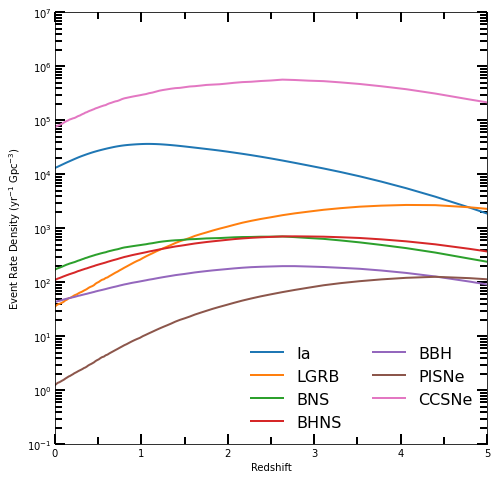

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    ax.plot(redshift, np.sum(event_rates[SFH]["Ia"], axis=0), label='Ia', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["LGRB"], axis=0), label='LGRB', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label='BNS', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label='BHNS', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label='BBH', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["PISNe"], axis=0), label='PISNe', lw=2)
    ax.plot(redshift, CCSN[SFH], label='CCSNe', lw=2)
    
    

    
ax.legend(frameon=False, fontsize=16, loc='best', ncol=2)
ax.set_xlabel("Redshift")
ax.set_ylabel(r'Event Rate Density ($\mathrm{yr}^{-1}\ \mathrm{Gpc}^{-3}$)')
ax.set_yscale("log")
ax.set_xlim(0, 5)
ax.set_ylim(1e-1, 1e7)

##### EM Event Rates

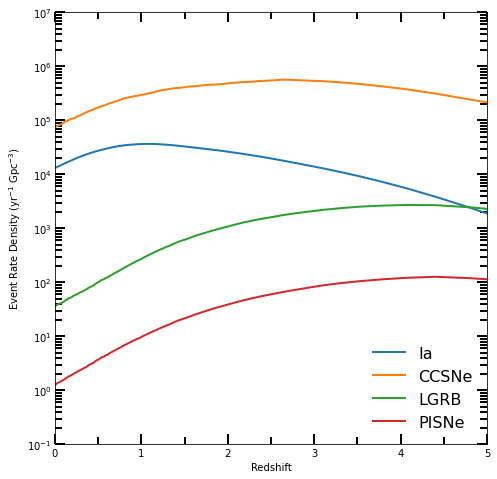

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])


set_axis(ax)

for SFH in SFH_names:
    ax.plot(redshift, np.sum(event_rates[SFH]["Ia"], axis=0), label='Ia', lw=2)
    ax.plot(redshift, CCSN[SFH], label='CCSNe', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["LGRB"], axis=0), label='LGRB', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["PISNe"], axis=0), label='PISNe', lw=2)
    
ax.legend(frameon=False, fontsize=16, loc='best')
ax.set_xlabel("Redshift")
ax.set_ylabel(r'Event Rate Density ($\mathrm{yr}^{-1}\ \mathrm{Gpc}^{-3}$)')
ax.set_yscale("log")
ax.set_xlim(0, 5)
ax.set_ylim(1e-1, 1e7)


plt.show()

##### GW Event Rates

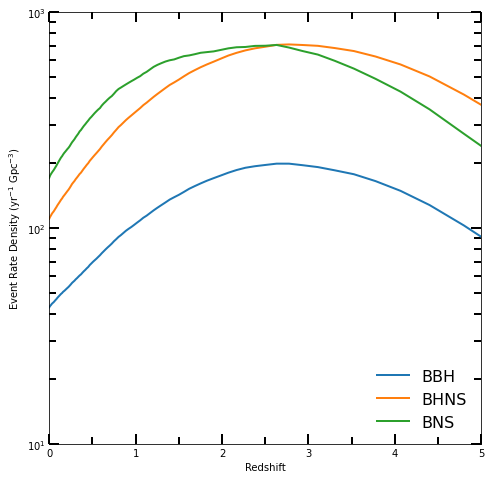

In [15]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1])

set_axis(ax)

for SFH in SFH_names:
    ax.plot(redshift, np.sum(event_rates[SFH]["BBH"], axis=0), label='BBH', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["BHNS"], axis=0), label='BHNS', lw=2)
    ax.plot(redshift, np.sum(event_rates[SFH]["BNS"], axis=0), label='BNS', lw=2)
    


    
ax.legend(frameon=False, fontsize=16, loc='lower right')
ax.set_xlabel("Redshift")
ax.set_ylabel(r'Event Rate Density ($\mathrm{yr}^{-1}\ \mathrm{Gpc}^{-3}$)')
ax.set_yscale("log")
ax.set_xlim(0, 5)
ax.set_ylim(1e1, 1e3)


plt.show()